# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

# Reading the data

In [2]:
df = pd.read_csv("D:\\archive\\Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Making some analysis

Text(0, 0.5, 'Count')

<Figure size 1500x500 with 0 Axes>

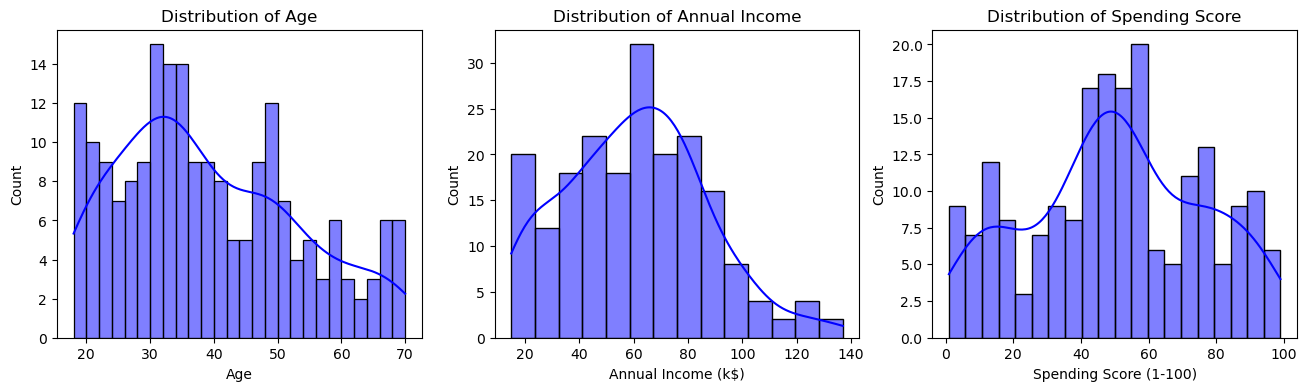

In [9]:
# Setting the hole size of the plots
plt.figure(figsize=(15,5))

# Making the subplots
fig, axes = plt.subplots(1, 3, figsize=(16,4))

# Making plot 1 that makes distribution by age
sns.histplot(df['Age'], kde=True, color='b', ax=axes[0], bins=26)
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Making plot 2 that makes distribution by annual income
sns.histplot(df['Annual Income (k$)'], kde=True, color='b', ax=axes[1], bins=14)
axes[1].set_title('Distribution of Annual Income')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')

# Making plot 3 that makes distribution by spending score
sns.histplot(df['Spending Score (1-100)'], kde=True, color='b', ax=axes[2], bins=20)
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')


# Making the clustring

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

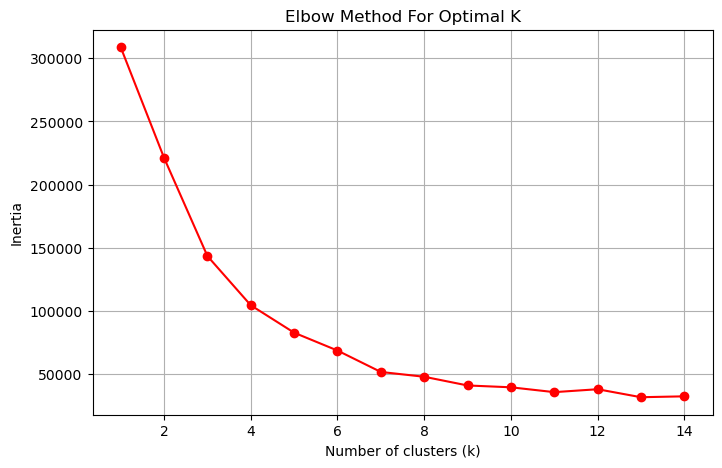

In [10]:
# making the ranges of the clusting
k_values = range(1, 15)
inertia_values = []

# calculating the inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_values.append(kmeans.inertia_)

# making a plot for the inertia values against k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', color='r')
plt.title('Elbow Method For Optimal K', color='black')
plt.xlabel('Number of clusters (k)', color='black')
plt.ylabel('Inertia', color='black')
plt.grid(True)
plt.show()

In [13]:
# making a copy from the data
df_k7 = df.copy(deep=True)
# applying KMeans clustering with K=7
kmeans = KMeans(n_clusters=7, n_init='auto')
df_k7['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# checking the cluster assignments
df_k7.sample(7)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
83,84,Female,46,54,44,4
157,158,Female,30,78,78,0
101,102,Female,49,62,48,4
122,123,Female,40,69,58,6
4,5,Female,31,17,40,1
187,188,Male,28,101,68,0
155,156,Female,27,78,89,0
